# CAR VALUATI0N SYSTEM

## BUSINESS UNDERSTANDING

### Project Overview
The Car Valuation System aims to develop a data-driven model that accurately estimates the market value of used cars based on various features such as make, model, age, mileage, fuel type, and more. By leveraging machine learning and data science techniques, the system will provide an automated solution for valuing used cars, which is beneficial for sellers, buyers, dealerships, and financial institutions.

### Business Problem
The primary goal of this project is to develop a robust predictive car valuation model that stakeholders can rely on for accurate pricing, thereby reducing uncertainties and fostering informed decision-making.
The used car market is dynamic, with prices influenced by multiple factors including age, condition, location, and demand for specific car models. This variability can lead to challenges for both buyers and sellers:
- Buyers: May overpay for a car if they do not have enough information about its true market value.
- Sellers: May undervalue their vehicles, leading to loss of potential profit.
- Dealerships: Need an efficient way to assess car values for pricing inventory and providing fair trade-in offers.
- Financial Institutions: Require accurate car valuations for loan approvals and insurance purposes.

### Project Objectives
- Develop a predictive model that takes various car features as input and returns an estimated market price.
- Incorporate data from different cities to ensure the model accounts for regional pricing variations.
- Evaluate and validate the model using standard regression metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) score to confirm the accuracy and reliability of the predictions.
- Deploy the model in a user-friendly format (e.g., web application) to enable real-time car price estimations.

### Stakeholders
- **Individual Sellers**: People who wish to sell their used cars and need an estimate of their vehicle’s worth.
- **Car Buyers**: Individuals looking to purchase used cars who need to know if the listed price is fair.
- **Dealerships**: Businesses that need a reliable tool for pricing trade-ins and inventory to maintain profitability and customer satisfaction.
- **Financial Institutions and Insurance Companies**: Organizations that provide car loans or insurance policies and require accurate car  
     valuations for underwriting and risk assessment.
- **Online Car Marketplaces**: Platforms that list used cars and could use the system to display fair price estimates for users.

## DATA UNDERSTANDING

### Data Overview
We aim to build this System by utilizing a dataset that comprises of car data from various regions and cities in India like Ahmedabad, Bangalore, Chennai, Gurgaon, Hyderabad, Jaipur, Kolkata, Mumbai, and Pune.

### Data Sources and Collection


### Data Description
The dataset contains the following features:

- `Brand`: The manufacturer or brand of the vehicle (e.g., Toyota, Ford).
- `Make_Year`: The year the vehicle was manufactured.
- `Fuel`: The type of fuel the vehicle uses (e.g., Petrol, Diesel, Electric).
- `KMs_Driven`: The total kilometers driven by the vehicle.
- `Engine_Displacement`: The engine capacity measured in liters or cubic centimeters (cc).
- `No_Of_Owner`: The number of previous owners the vehicle has had.
- `Transmission`: Type of transmission (e.g., Manual, Automatic).
- `Mileage`: The distance the vehicle can travel per unit of fuel (usually measured in km/l).
- `Max_Power`: The maximum power output of the engine (measured in horsepower or kilowatts).
- `Torque`: The twisting force produced by the engine (measured in Nm).
- `Seats`: The number of seats in the vehicle.
- `Color`: The color of the vehicle.
- `Gear_Box`: The type of gearbox (could be automatic or manual).
- `Drive_Type`: The drivetrain configuration (e.g., Front-Wheel Drive, Rear-Wheel Drive, All-Wheel Drive).
- `Steering_Type`: The type of steering system (e.g., Power Steering, Manual Steering).
- `Front_Brake_Type`: The type of brakes used on the front wheels (e.g., Disc, Drum).
- `Rear_Brake_Type`: The type of brakes used on the rear wheels (e.g., Disc, Drum).
- `Acceleration`: The time taken to accelerate from 0 to 100 km/h (measured in seconds).
- `Price`: The selling price of the vehicle(The Target Variable).

### Data Exploration

In [241]:
# Import the relevant libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [242]:
# List of city CSV filenames
city_files = [
    'banglore.csv',
    'chennai.csv',
    'gurgaon.csv',
    'hyderabad.csv',
    'jaipur.csv',
    'kolkata.csv',
    'mumbai.csv',
    'pune.csv',
    'ahmedabad.csv'
]
# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through each file and load it into a DataFrame
for city_file in city_files:
    df = pd.read_csv(city_file)  
    df['City'] = city_file.split('.')[0]  # Add a new column for the city
    dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the first 10 rows of combined DataFrame
combined_df.head(10)


,Unnamed: 0,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,...,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Engine_Type,Price,City
0,0,2017 Hyundai Xcent,2017,Petrol,"32,540 Kms",1197 cc,1st Owner,Manual,19.1 kmpl,82bhp,...,Other,5 Speed,FWD,Power,Disc,Drum,14.2 Seconds,Kappa VTVT Petrol Engine,"5,97,000",banglore
1,1,2016 Hyundai i20,2015,Petrol,"41,061 Kms",1197 cc,1st Owner,Manual,18.6 kmpl,81.83bhp,...,Red,5 Speed,FWD,Power,Disc,Drum,13.2 Seconds,Kappa VTVT Petrol Engine,"5,70,000",banglore
2,2,2019 Honda Amaze,2018,Petrol,"40,674 Kms",1198 cc,1st Owner,Manual,17.8 kmpl,86.7bhp,...,White,5 Speed,FWD,Power,Disc,Drum,15 Seconds,i-VTEC Petrol Engine,"6,00,000",banglore
3,3,2011 Toyota Etios,2011,Petrol,"67,142 Kms",1496 cc,1st Owner,Manual,17.6 kmpl,15,...,Other,NaN,NaN,Power,NaN,NaN,NaN,-,"3,49,500",banglore
4,4,2018 Hyundai i20,2018,Petrol,"19,274 Kms",1197 cc,1st Owner,Manual,21 kmpl,81.86bhp,...,White,5 Speed,NaN,Electric,Disc,Drum,NaN,1.2 l Kappa petrol,"7,80,000",banglore
5,5,2016 Ford Ecosport,2016,Petrol,"46,012 Kms",1497 cc,3rd Owner,Manual,17 kmpl,121.36bhp,...,Blue,5 Speed,FWD,Power,Ventilated Disc,Drum,NaN,Ti-VCT Petrol Engine,"5,54,000",banglore
6,6,2012 Hyundai i20,2012,Diesel,"100,609 Kms",1396 cc,1st Owner,Manual,21.27 kmpl,88.76bhp,...,Silver,6 Speed,FWD,Power,Disc,Disc,NaN,U2 CRDI Diesel Engine,"4,15,000",banglore
7,7,2013 Hyundai EON,2013,Petrol,"16,420 Kms",814 cc,2nd Owner,Manual,21.1 kmpl,55.2bhp,...,Grey,5 Speed,FWD,Power,Disc,Drum,19 Seconds,Petrol Engine,"2,70,000",banglore
8,8,2017 Renault KWID,2017,Petrol,"25,148 Kms",999 cc,1st Owner,Manual,23.01 kmpl,67bhp,...,Grey,5 Speed,FWD,Power,Disc,Drum,NaN,Petrol Engine,"3,75,000",banglore
9,9,2014 Ford Ecosport,2014,Diesel,"62,234 Kms",1498 cc,2nd Owner,Manual,21.7 kmpl,99.23bhp,...,Grey,5 Speed,FWD,Electric,Ventilated Disc,Drum,NaN,1.5 L Diesel Engine,"6,00,000",banglore


In [243]:
# Display the last 10 rows of the dataset
combined_df.tail(10)

,Unnamed: 0,Brand,Make_Year,Fuel,KMs_Driven,Engine_Displacement,No_Of_Owner,Transmission,Mileage,Max_Power,...,Color,Gear_Box,Drive_Type,Steering_Type,Front_Brake_Type,Rear_Brake_Type,Acceleration,Engine_Type,Price,City
5187,440,Maruti Ertiga SHVS VDI,2017,Diesel,"45,000 kms",1248 CC,First Owner,Manual,24.52 kmpl,88.5 bhp,...,Silver,6 Speed,FWD,Power,Ventilated Disc,Drum,13.3 Seconds,D13A SHVS Engine,6.5 Lakh*,ahmedabad
5188,441,Maruti Wagon R Stingray VXI Optional,2017,Petrol,"46,000 kms",998 CC,First Owner,Manual,20.51 kmpl,67.04 bhp,...,White,6 Speed,FWD,Power,Ventilated Disc,Drum,15 Seconds,K 10B Petrol Engine,4.4 Lakh*,ahmedabad
5189,442,Maruti Ciaz 1.3 Delta,2017,Diesel,"87,000 kms",1248 CC,Second Owner,Manual,28.09 kmpl,88.5 bhp,...,White,7 Speed CVT,FWD,Power,Ventilated Disc,Drum,15 Seconds,DDIS 200 Engine,5.75 Lakh*,ahmedabad
5190,443,Hyundai Verna 1.6 SX CRDi (O),2013,Diesel,"83,000 kms",1582 CC,First Owner,Manual,22.32 kmpl,126.32 bhp,...,Black,5 Speed,FWD,Power,Disc,Disc,10.62 Seconds,Diesel Engine,5.4 Lakh*,ahmedabad
5191,444,Maruti Wagon R Stingray VXI Optional,2017,Petrol,"46,000 kms",998 CC,First Owner,Manual,20.51 kmpl,67.04 bhp,...,White,4 Speed,FWD,Power,Ventilated Disc,Drum,15 Seconds,K 10B Petrol Engine,4.4 Lakh*,ahmedabad
5192,445,Maruti Ciaz 1.3 Delta,2017,Diesel,"87,000 kms",1248 CC,Second Owner,Manual,28.09 kmpl,88.5 bhp,...,White,6 Speed,FWD,Power,Ventilated Disc,Drum,15 Seconds,DDIS 200 Engine,5.75 Lakh*,ahmedabad
5193,446,Hyundai Verna 1.6 SX CRDi (O),2013,Diesel,"83,000 kms",1582 CC,First Owner,Manual,22.32 kmpl,126.32 bhp,...,White,5 Speed,FWD,Power,Disc,Disc,10.62 Seconds,Diesel Engine,5.4 Lakh*,ahmedabad
5194,447,Hyundai Verna 1.6 CRDi AT SX,2015,Diesel,"55,000 kms",1582 CC,First Owner,Automatic,19.08 kmpl,126.2 bhp,...,White,5 Speed,FWD,Power,Disc,Drum,10.62 Seconds,U2 VGT Diesel Engine,6.9 Lakh*,ahmedabad
5195,448,Mahindra XUV500 2011-2015 W8 FWD,2012,Diesel,"76,000 kms",2179 CC,Second Owner,Manual,15.1 kmpl,140 bhp,...,Grey,5 Speed,AWD,Power,Disc & Caliper Type,Disc & Caliper Type,12.5 Seconds,mHawk Diesel Engine,5.25 Lakh*,ahmedabad
5196,449,Renault Duster 110PS Diesel RxZ,2013,Diesel,"52,000 kms",1461 CC,First Owner,Manual,19.01 kmpl,108.45 bhp,...,White,6 Speed,FWD,Power,Ventilated Disc,Drum,-,dCi Diesel Engine,4.9 Lakh*,ahmedabad


In [244]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197 entries, 0 to 5196
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5197 non-null   int64 
 1   Brand                5197 non-null   object
 2   Make_Year            5197 non-null   int64 
 3   Fuel                 5197 non-null   object
 4   KMs_Driven           5197 non-null   object
 5   Engine_Displacement  5197 non-null   object
 6   No_Of_Owner          5197 non-null   object
 7   Transmission         5197 non-null   object
 8   Mileage              5197 non-null   object
 9   Max_Power            5197 non-null   object
 10  Torque               5197 non-null   object
 11  Seats                5197 non-null   int64 
 12  Color                5197 non-null   object
 13  Gear_Box             5189 non-null   object
 14  Drive_Type           5104 non-null   object
 15  Steering_Type        5172 non-null   object
 16  Front_

In [245]:
# Check the shape of the data
combined_df.shape

(5197, 22)

In [246]:
# Check for the data type
combined_df.dtypes

Unnamed: 0              int64
Brand                  object
Make_Year               int64
Fuel                   object
KMs_Driven             object
Engine_Displacement    object
No_Of_Owner            object
Transmission           object
Mileage                object
Max_Power              object
Torque                 object
Seats                   int64
Color                  object
Gear_Box               object
Drive_Type             object
Steering_Type          object
Front_Brake_Type       object
Rear_Brake_Type        object
Acceleration           object
Engine_Type            object
Price                  object
City                   object
dtype: object

In [274]:
# Summary Statistics
combined_df.describe()

,Unnamed: 0,Make_Year,KMs_Driven,Engine_Displacement,No_Of_Owner,Mileage,Max_Power,Torque,Seats,Acceleration,Price
count,5197.000000,5197.000000,5.197000e+03,5197.000000,5197.000000,5197.000000,5.197000e+03,5.197000e+03,5197.000000,5197.000000,5.197000e+03
mean,322.543968,2014.891861,5.907608e+04,1378.602944,1.063691,20.310015,2.923682e+03,5.279584e+09,5.188378,13.491968,1.860679e+05
std,220.778040,3.094708,5.005838e+04,457.092913,0.246577,23.430610,5.140572e+04,1.247176e+10,0.653730,2.651471,2.738714e+05
min,0.000000,1995.000000,2.010000e+02,5.000000,1.000000,0.000000,4.000000e+00,5.000000e+00,2.000000,4.200000,1.000000e+00
25%,144.000000,2013.000000,3.249200e+04,1197.000000,1.000000,17.710000,7.390000e+01,1.137500e+02,5.000000,12.600000,4.250000e+00
50%,294.000000,2015.000000,5.400000e+04,1199.000000,1.000000,20.000000,8.312500e+01,4.400000e+02,5.000000,13.300000,9.650000e+00
75%,461.000000,2017.000000,7.703800e+04,1498.000000,1.000000,22.320000,1.036000e+02,1.902000e+06,5.000000,14.300000,3.880000e+05
max,1004.000000,2021.000000,2.150000e+06,5461.000000,3.000000,1197.000000,1.186600e+06,8.502000e+10,9.000000,30.300000,1.899000e+06


## DATA PREPARATION

### Data Cleaning

In [248]:
# Check for duplicates.
combined_df.duplicated()
#df.loc[df.duplicated()]

0       False
1       False
2       False
3       False
4       False
        ...  
5192    False
5193    False
5194    False
5195    False
5196    False
Length: 5197, dtype: bool

- Implication: No Duplicates

#### Data Type Conversion

In [249]:
combined_df.dtypes

Unnamed: 0              int64
Brand                  object
Make_Year               int64
Fuel                   object
KMs_Driven             object
Engine_Displacement    object
No_Of_Owner            object
Transmission           object
Mileage                object
Max_Power              object
Torque                 object
Seats                   int64
Color                  object
Gear_Box               object
Drive_Type             object
Steering_Type          object
Front_Brake_Type       object
Rear_Brake_Type        object
Acceleration           object
Engine_Type            object
Price                  object
City                   object
dtype: object

In [250]:

# Convert relevant columns to string type first
columns_to_clean = ['KMs_Driven', 'Engine_Displacement', 'No_Of_Owner', 
                    'Mileage', 'Max_Power', 'Torque', 'Acceleration', 'Price']

for col in columns_to_clean:
    combined_df[col] = combined_df[col].astype(str)

# Clean and convert to numeric
combined_df['KMs_Driven'] = pd.to_numeric(combined_df['KMs_Driven'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Engine_Displacement'] = pd.to_numeric(combined_df['Engine_Displacement'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['No_Of_Owner'] = pd.to_numeric(combined_df['No_Of_Owner'].str.replace(r'[^0-9]+', '', regex=True), errors='coerce')
combined_df['Mileage'] = pd.to_numeric(combined_df['Mileage'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Max_Power'] = pd.to_numeric(combined_df['Max_Power'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Torque'] = pd.to_numeric(combined_df['Torque'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Acceleration'] = pd.to_numeric(combined_df['Acceleration'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')
combined_df['Price'] = pd.to_numeric(combined_df['Price'].str.replace(r'[^0-9.]+', '', regex=True), errors='coerce')

# Convert categorical columns to 'category' dtype
combined_df['Brand'] = combined_df['Brand'].astype('category')
combined_df['Fuel'] = combined_df['Fuel'].astype('category')
combined_df['Transmission'] = combined_df['Transmission'].astype('category')
combined_df['Color'] = combined_df['Color'].astype('category')
combined_df['Gear_Box'] = combined_df['Gear_Box'].astype('category')
combined_df['Drive_Type'] = combined_df['Drive_Type'].astype('category')
combined_df['Steering_Type'] = combined_df['Steering_Type'].astype('category')
combined_df['Front_Brake_Type'] = combined_df['Front_Brake_Type'].astype('category')
combined_df['Rear_Brake_Type'] = combined_df['Rear_Brake_Type'].astype('category')
combined_df['Engine_Type'] = combined_df['Engine_Type'].astype('category')
combined_df['City'] = combined_df['City'].astype('category')

# Check the data types after conversion
print("Data types after conversion:")
print(combined_df.dtypes)


Data types after conversion:
Unnamed: 0                int64
Brand                  category
Make_Year                 int64
Fuel                   category
KMs_Driven                int64
Engine_Displacement     float64
No_Of_Owner             float64
Transmission           category
Mileage                 float64
Max_Power               float64
Torque                  float64
Seats                     int64
Color                  category
Gear_Box               category
Drive_Type             category
Steering_Type          category
Front_Brake_Type       category
Rear_Brake_Type        category
Acceleration            float64
Engine_Type            category
Price                   float64
City                   category
dtype: object


#### Missing Values

In [251]:
# Check for missing values
missing_values = combined_df.isnull().sum()
missing_values

Unnamed: 0                0
Brand                     0
Make_Year                 0
Fuel                      0
KMs_Driven                0
Engine_Displacement       2
No_Of_Owner            3265
Transmission              0
Mileage                  87
Max_Power                41
Torque                    2
Seats                     0
Color                     0
Gear_Box                  8
Drive_Type               93
Steering_Type            25
Front_Brake_Type         24
Rear_Brake_Type          24
Acceleration           1435
Engine_Type              53
Price                     0
City                      0
dtype: int64

In [252]:

# Convert relevant columns to 'category' dtype before handling missing values
categorical_columns = [
    'Fuel', 
    'Transmission', 
    'Color', 
    'Gear_Box', 
    'Drive_Type', 
    'Steering_Type', 
    'Front_Brake_Type', 
    'Rear_Brake_Type', 
    'Engine_Type'
]

# Convert specified columns to category
for col in categorical_columns:
    combined_df[col] = combined_df[col].astype('category')

# Verify the data types
print(combined_df.dtypes)

# Handle missing values for categorical columns
for col in categorical_columns:
    # Add 'Unknown' category if it doesn't exist
    combined_df[col] = combined_df[col].cat.add_categories(['Unknown'])

# Fill missing values with 'Unknown' or mode for specific columns
combined_df['No_Of_Owner'].fillna(combined_df['No_Of_Owner'].mode()[0], inplace=True)  # Fill with mode
combined_df['Gear_Box'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Drive_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Steering_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Front_Brake_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Rear_Brake_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Engine_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'

# Handle missing values for numerical columns with median
combined_df['Engine_Displacement'].fillna(combined_df['Engine_Displacement'].median(), inplace=True)  # Median
combined_df['Mileage'].fillna(combined_df['Mileage'].median(), inplace=True)  # Median
combined_df['Max_Power'].fillna(combined_df['Max_Power'].median(), inplace=True)  # Median
combined_df['Torque'].fillna(combined_df['Torque'].median(), inplace=True)  # Median
combined_df['Acceleration'].fillna(combined_df['Acceleration'].median(), inplace=True)  # Median

# Check for missing values after imputation
missing_values_after = combined_df.isnull().sum()
print("Missing values after further imputation:")
print(missing_values_after[missing_values_after > 0])  # Display only columns with missing values


Unnamed: 0                int64
Brand                  category
Make_Year                 int64
Fuel                   category
KMs_Driven                int64
Engine_Displacement     float64
No_Of_Owner             float64
Transmission           category
Mileage                 float64
Max_Power               float64
Torque                  float64
Seats                     int64
Color                  category
Gear_Box               category
Drive_Type             category
Steering_Type          category
Front_Brake_Type       category
Rear_Brake_Type        category
Acceleration            float64
Engine_Type            category
Price                   float64
City                   category
dtype: object
Missing values after further imputation:
Series([], dtype: int64)


In [253]:
'''
# Handle missing values in categorical columns
combined_df['No_Of_Owner'].fillna(combined_df['No_Of_Owner'].mode()[0], inplace=True)  # Fill with mode
combined_df['Gear_Box'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Drive_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Steering_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Front_Brake_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Rear_Brake_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'
combined_df['Engine_Type'].fillna('Unknown', inplace=True)  # Fill with 'Unknown'

# Handle missing values in numerical columns
combined_df['Engine_Displacement'].fillna(combined_df['Engine_Displacement'].median(), inplace=True)  # Median
combined_df['Mileage'].fillna(combined_df['Mileage'].median(), inplace=True)  # Median
combined_df['Max_Power'].fillna(combined_df['Max_Power'].median(), inplace=True)  # Median
combined_df['Torque'].fillna(combined_df['Torque'].median(), inplace=True)  # Median
combined_df['Acceleration'].fillna(combined_df['Acceleration'].median(), inplace=True)  # Median

# Check for missing values again after imputation
missing_values_after = combined_df.isnull().sum()
print("Missing values after further imputation:")
print(missing_values_after[missing_values_after > 0])  # Display only columns with missing values
'''


'\n# Handle missing values in categorical columns\ncombined_df[\'No_Of_Owner\'].fillna(combined_df[\'No_Of_Owner\'].mode()[0], inplace=True)  # Fill with mode\ncombined_df[\'Gear_Box\'].fillna(\'Unknown\', inplace=True)  # Fill with \'Unknown\'\ncombined_df[\'Drive_Type\'].fillna(\'Unknown\', inplace=True)  # Fill with \'Unknown\'\ncombined_df[\'Steering_Type\'].fillna(\'Unknown\', inplace=True)  # Fill with \'Unknown\'\ncombined_df[\'Front_Brake_Type\'].fillna(\'Unknown\', inplace=True)  # Fill with \'Unknown\'\ncombined_df[\'Rear_Brake_Type\'].fillna(\'Unknown\', inplace=True)  # Fill with \'Unknown\'\ncombined_df[\'Engine_Type\'].fillna(\'Unknown\', inplace=True)  # Fill with \'Unknown\'\n\n# Handle missing values in numerical columns\ncombined_df[\'Engine_Displacement\'].fillna(combined_df[\'Engine_Displacement\'].median(), inplace=True)  # Median\ncombined_df[\'Mileage\'].fillna(combined_df[\'Mileage\'].median(), inplace=True)  # Median\ncombined_df[\'Max_Power\'].fillna(combined_

### Visualizations

In [292]:
import warnings
# Suppress specific FutureWarnings from pandas
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

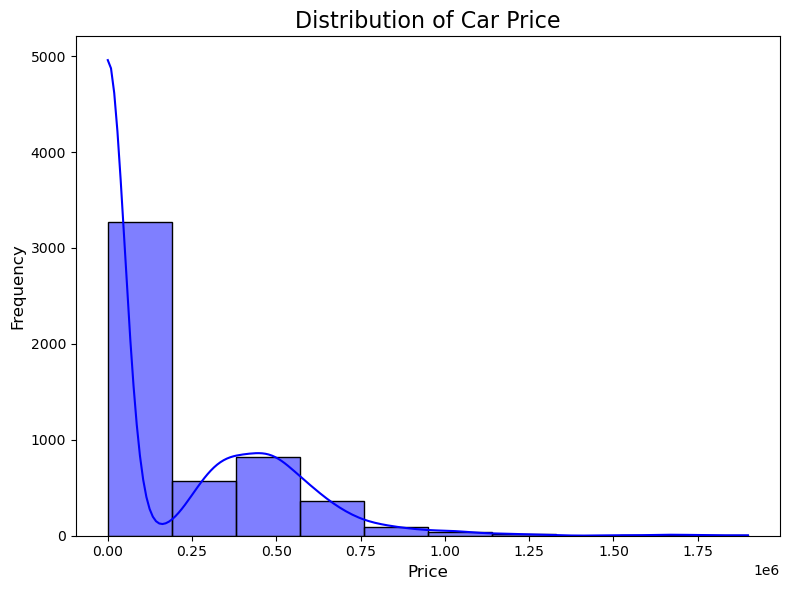

In [293]:
# Distribution of Car Price

plt.figure(figsize=(8, 6))
sns.histplot(combined_df['Price'], kde=True, color='blue', bins=10)  
plt.title('Distribution of Car Price', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


Observations:

- The plot shows a right-skewed distribution of car prices. This means that most cars are priced lower, while a smaller number of cars are 
  priced very high.
- Peak at Lower Price indicate cars are priced in the lower range.
- The long tail towards the higher end of the price range indicates presence of a few luxury, very expensive or high-end cars.
- The extreme values in the right tail might be considered outliers, representing very expensive or unique vehicles.

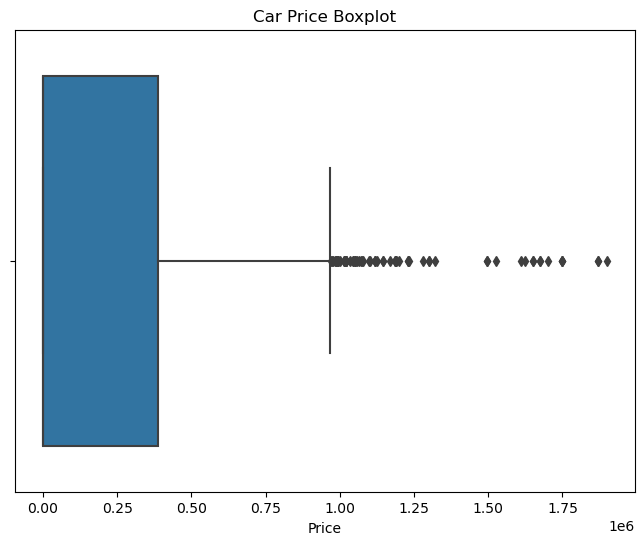

In [294]:
# Box Plot for Outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=combined_df['Price'])
plt.title('Car Price Boxplot')
plt.show()


Observations: 

- Most cars are priced lower since the majority of cars are clustered towards the lower price range.
- A few cars are very expensive since there are a few outliers with significantly higher prices.
- Price distribution is skewed meaning the data is not evenly distributed, with more cars at the lower end of the price spectrum.

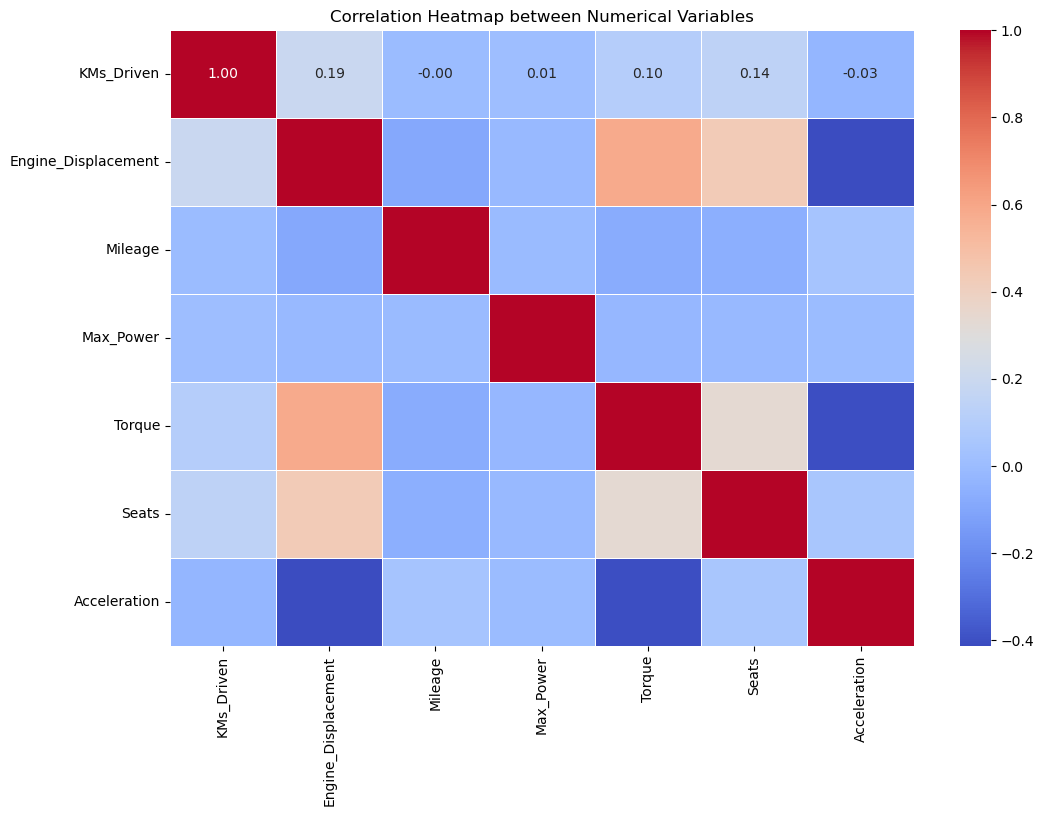

In [297]:
# Correlation Heatmap between Numerical Variables

plt.figure(figsize=(12, 8))
numerical_cols = ['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque', 'Seats', 'Acceleration']
correlation_matrix = combined_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Numerical Variables')
plt.show()


Observations:

- Strong Positive Correlation:
KMs_Driven and Mileage: This is expected as higher mileage indicates more kilometers driven.

- Moderate Positive Correlations:
Engine_Displacement and Max_Power: Larger engines typically produce more power.
Engine_Displacement and Torque: Larger engines generally produce more torque.

- Weak or No Correlation:Most other pairs of variables show weak or no correlation suggesting that these variables are relatively independent of each other.

The Heatmap generally reveals that mileage is strongly correlated with kilometers driven, and engine displacement is positively correlated with power and torque.


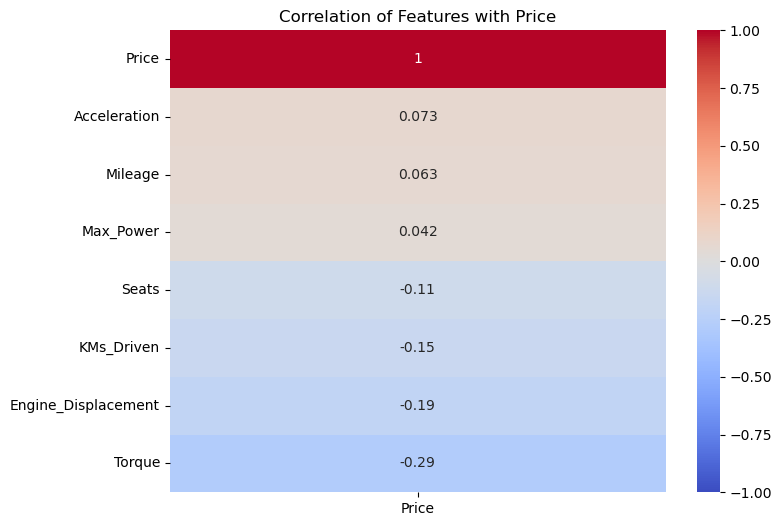

In [ ]:
# Correlation HeatMap of Features with Price

numeric_cols = ['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque', 'Seats', 'Acceleration', 'Price']
correlation_matrix = combined_df[numeric_cols].corr()

# Filter the correlation matrix to only include correlations with 'Price'
price_corr = correlation_matrix[['Price']].sort_values(by='Price', ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(price_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Features with Price")
plt.show()


Observations:
- Positive Correlation:
1. Acceleration and Price: This suggests that cars with higher acceleration tend to be more expensive.

- Negative Correlation:
1. Torque and Price: This indicates that cars with higher torque tend to be less expensive.
2. Engine Displacement and Price: A similar trend is observed here, with higher engine displacements often associated with lower prices.
3. KMs_Driven and Price: This is expected as cars with higher mileage tend to be less expensive.
4. Mileage and Price: Similar to KMs_Driven, higher mileage often correlates with lower prices.

In conclusion, the heatmap reveals that acceleration is positively correlated with price, while torque, engine displacement, kilometers driven, and mileage are negatively correlated with price.

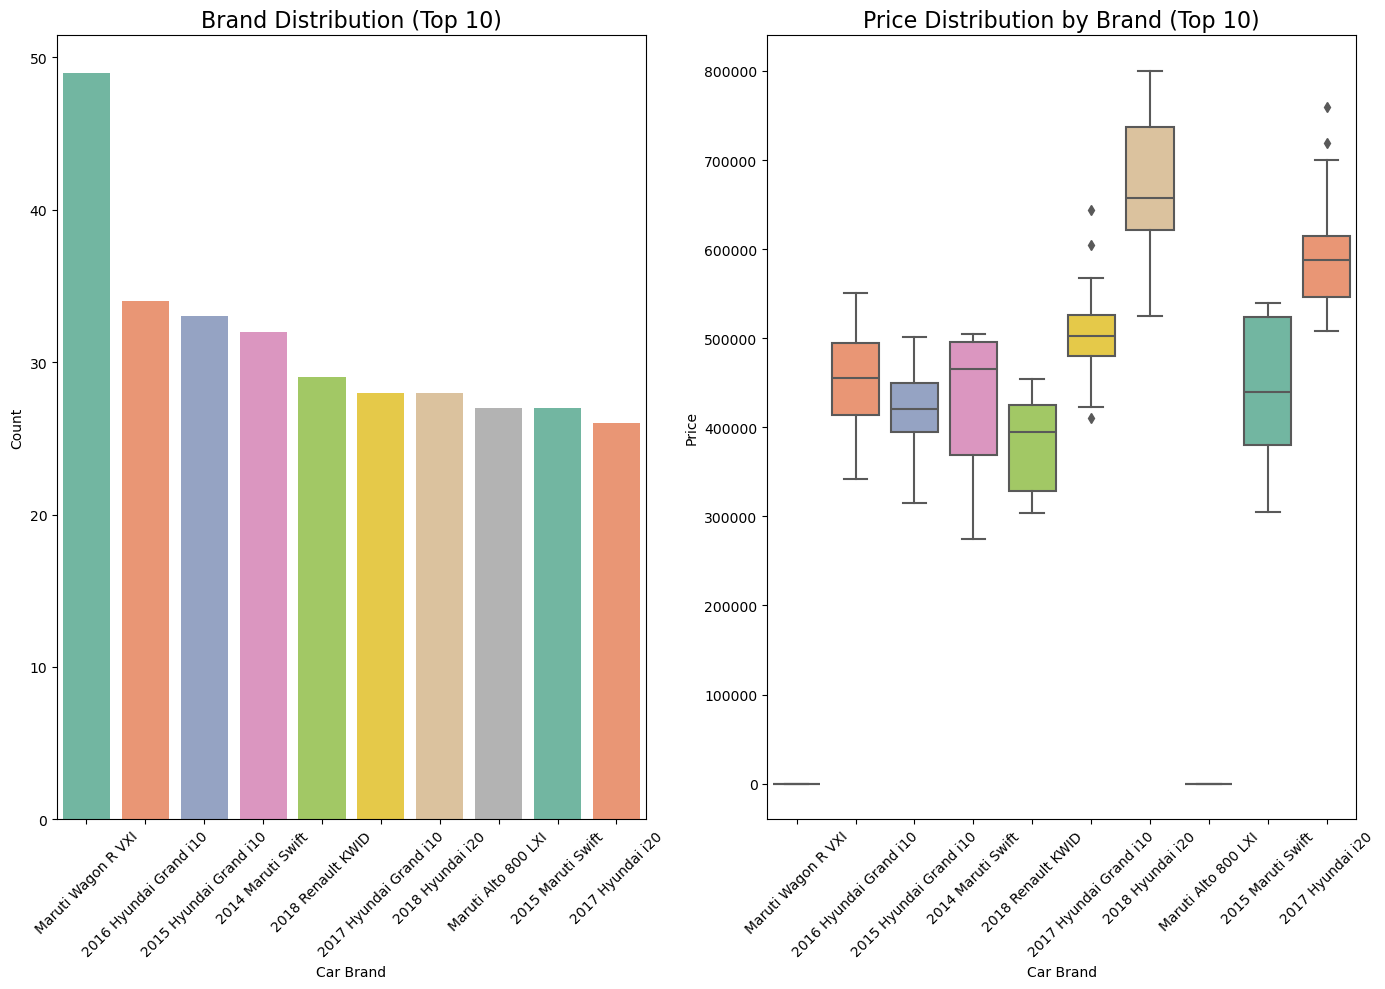

In [ ]:
# Brand Distribution and Price Vs Brand

# Get the top 10 most common car brands
top_10_brands = combined_df['Brand'].value_counts().nlargest(10).index

# Filter the DataFrame to only include the top 10 brands for Brand vs Price plot
brand_df = combined_df[combined_df['Brand'].isin(top_10_brands)]

# Create a figure with two subplots
plt.figure(figsize=(14, 10))

# Distribution of the top 10 brands
plt.subplot(1, 2, 1)
sns.countplot(data=brand_df, x='Brand', order=top_10_brands, palette='Set2')
plt.title('Brand Distribution (Top 10)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Car Brand')
plt.ylabel('Count')

# Brand vs Price (Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(data=brand_df, x='Brand', y='Price', order=top_10_brands, palette='Set2')
plt.title('Price Distribution by Brand (Top 10)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Car Brand')
plt.ylabel('Price')

plt.tight_layout()

# Show the plot
plt.show()


Observations:
1. Brand Distribution
- Dominance of Maruti and Hyundai: Both brands have multiple models in the top 10, indicating their popularity in the market.
- The top 10 list includes several newer models, suggesting a preference for recent car models.
- Compact car models like the Maruti Wagon R, Hyundai Grand i10, and Maruti Swift are well-represented, indicating a preference for this segment.
  
2. Price Distribution by Brand
- There is significant price variation among the top 10 car brands.
- Some brands have outliers, indicating the presence of very expensive models within those brands.
- The median price varies across different brands.
  
In conclusion, the plots suggest that certain brands, particularly Maruti and Hyundai, are more popular in the market. Additionally, there is a preference for newer models and compact cars. The price distribution varies across brands, with some brands offering a wider range of prices than others.

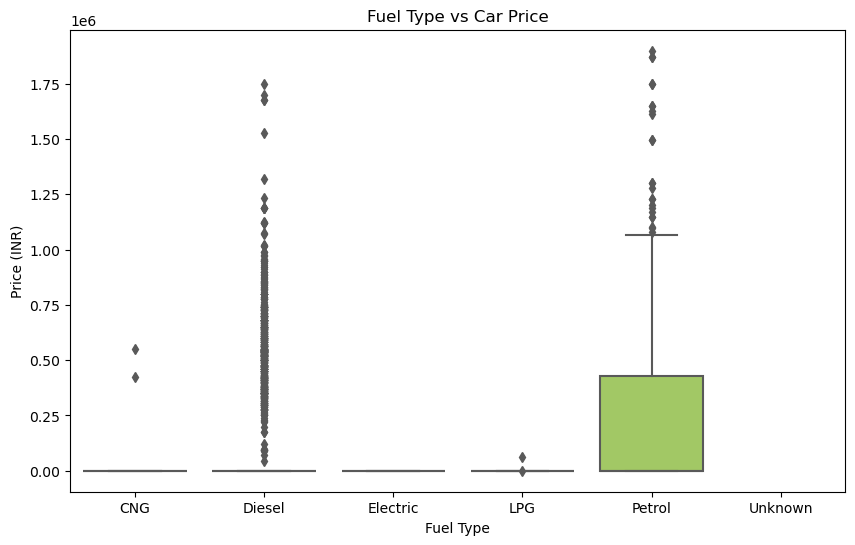

In [298]:
# Fuel Type Vs Price

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel', y='Price', data=combined_df, palette='Set2')
plt.title('Fuel Type vs Car Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.show()


Observations:

- The median price for petrol cars is significantly higher than other fuel types.
- Diesel cars have a wider range of prices compared to other fuel types.
- Electric, CNG, LPG, and Unknown fuel types have fewer data points and a narrower price range.
- There are several high-priced outliers for petrol cars, indicating the presence of luxury or premium vehicles.
- Outliers are less prominent in other fuel types, suggesting a more consistent pricing range.
- The median price for petrol cars is significantly higher than other fuel types, suggesting that petrol cars are generally more expensive.
Generally, the boxplot reveals that fuel type is a significant factor influencing car prices, with petrol cars generally being more expensive than other fuel types.

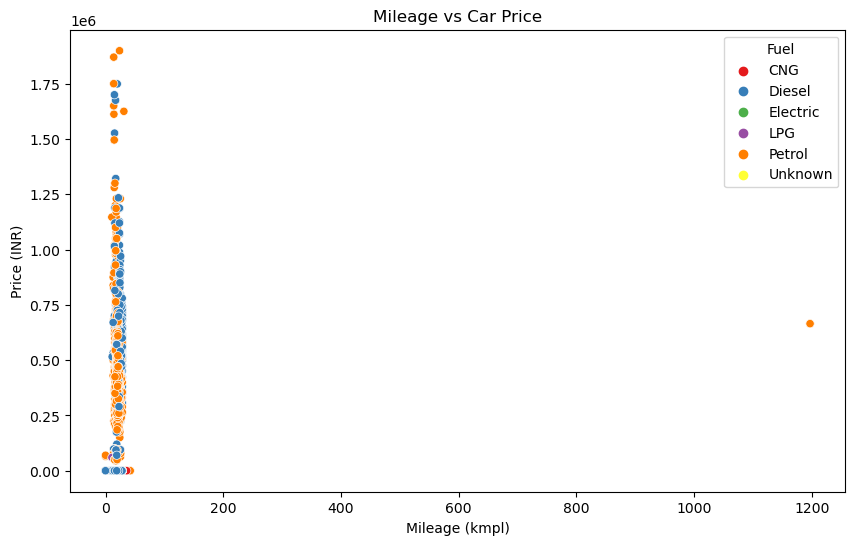

In [258]:
# Mileage Vs Price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=combined_df, hue='Fuel', palette='Set1')
plt.title('Mileage vs Car Price')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (INR)')
plt.show()


Observations:

- There is a weak negative correlation between mileage and price, meaning that as mileage increases, price tends to decrease slightly. However, this relationship is not very strong.
- There are some outliers in the plot, particularly for higher-priced cars with lower mileage.
- Different fuel types seem to have different price ranges, with some fuel types (like electric) generally being more expensive.
In general, while there is a slight negative relationship between mileage and price, other factors like fuel type, car model, and features likely play a more significant role in determining car prices.


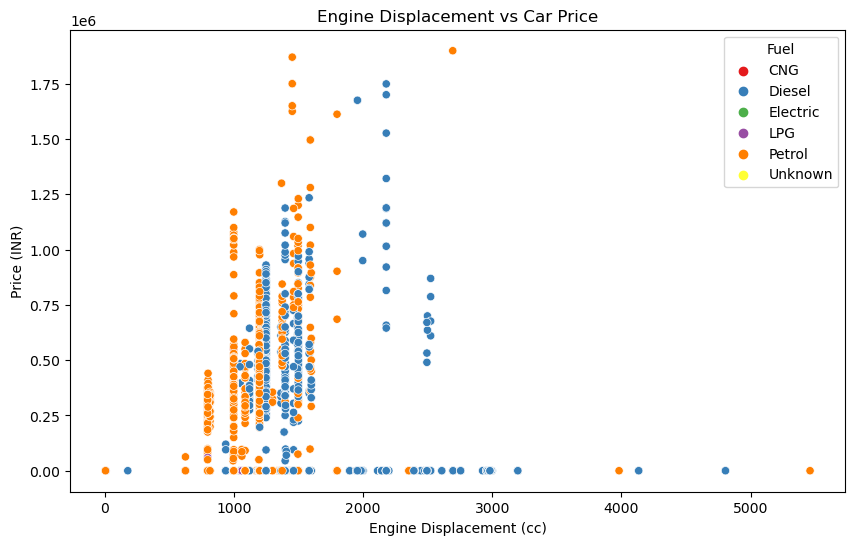

In [259]:
# Engine Displacement Vs Price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine_Displacement', y='Price', data=combined_df, hue='Fuel', palette='Set1')
plt.title('Engine Displacement vs Car Price')
plt.xlabel('Engine Displacement (cc)')
plt.ylabel('Price (INR)')
plt.show()


Observations:
- There is a positive correlation between engine displacement and car price, meaning that as engine displacement increases, the price tends to increase as well.
- There are some outliers in the plot, particularly for higher-priced cars with lower engine displacements.
- Different fuel types seem to have different price ranges, with some fuel types (like electric) generally being more expensive.
In conclusion, engine displacement is a significant factor influencing car prices, but other factors like fuel type, car model, and features also play a role.

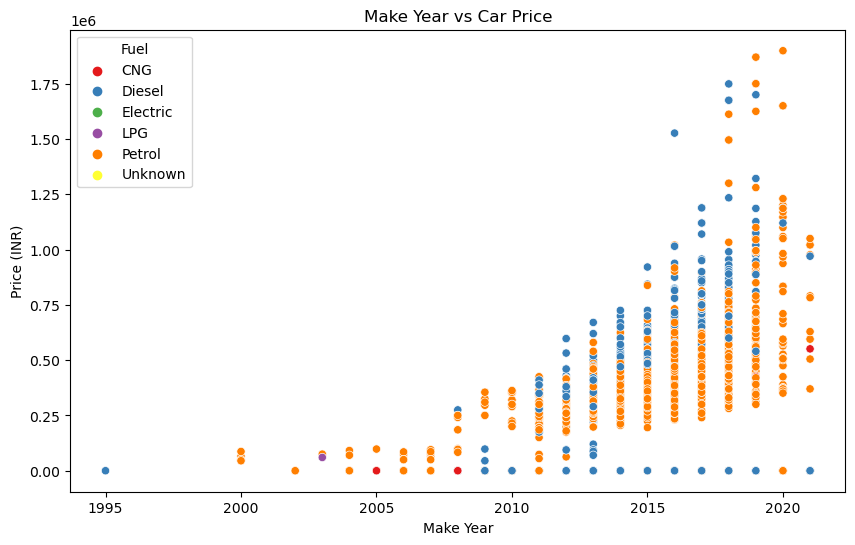

In [260]:
# Car Make Year Vs Price

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Make_Year', y='Price', data=combined_df, hue='Fuel', palette='Set1')
plt.title('Make Year vs Car Price')
plt.xlabel('Make Year')
plt.ylabel('Price (INR)')
plt.show()


Observations:
- There is a strong positive correlation between the make year and the car price meaning that newer cars tend to be more expensive.
- There are some outliers, especially for older cars with higher prices and newer cars with lower prices.
- Different fuel types seem to have different price ranges, with some fuel types (like electric) generally being more expensive.
In conclusion the make year is a significant factor influencing car prices, with newer cars generally being more expensive. However, other factors like fuel type, car model, and features also play a role.

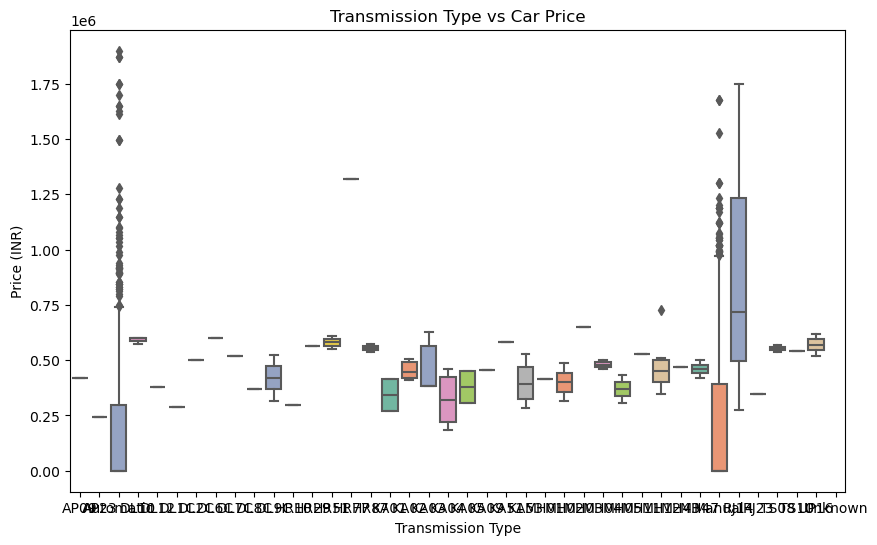

In [299]:
# Transmission Type Vs Price

plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price', data=combined_df, palette='Set2')
plt.title('Transmission Type vs Car Price')
plt.xlabel('Transmission Type')
plt.ylabel('Price (INR)')
plt.show()


Observations:
- There is significant variation in car prices across different transmission types. Some transmission types have a wider range of prices, while 
  others are more concentrated.
- There are outliers in some transmission types, indicating the presence of very expensive or very cheap cars within those categories.
- The median price varies across different transmission types, suggesting that certain types of transmissions may be associated with higher or   
  lower-priced cars.
In conclusion, the transmission type can influence the price of a car. Some types of transmissions may be associated with higher-priced or lower-priced cars.

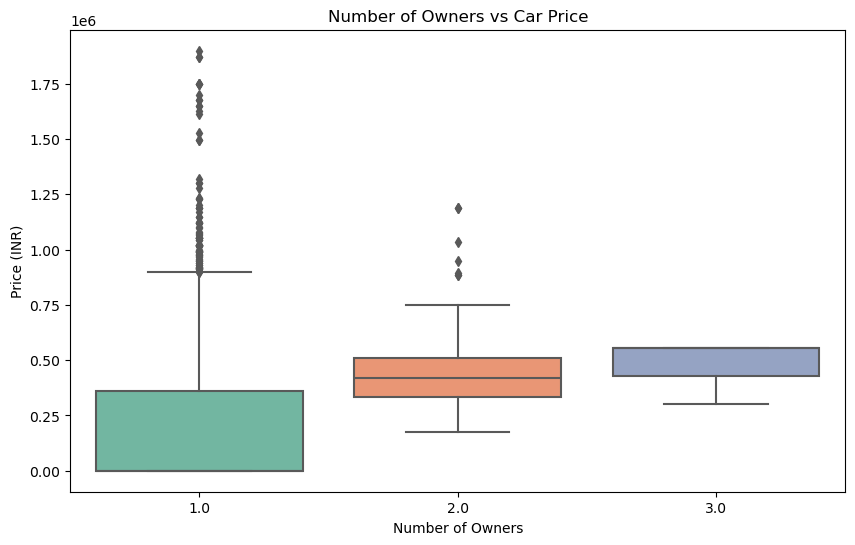

In [262]:
# Price by Number of Owners

plt.figure(figsize=(10, 6))
sns.boxplot(x='No_Of_Owner', y='Price', data=combined_df, palette='Set2')
plt.title('Number of Owners vs Car Price')
plt.xlabel('Number of Owners')
plt.ylabel('Price (INR)')
plt.show()


Observations:

- There is a general trend of decreasing price as the number of owners increases.
-  There are some outliers, especially for cars with fewer owners, indicating the presence of very expensive cars with fewer previous owners.
- The median price decreases as the number of owners increases.
In conclusion, the number of owners can influence the price of a car, with cars having fewer owners generally being more expensive.

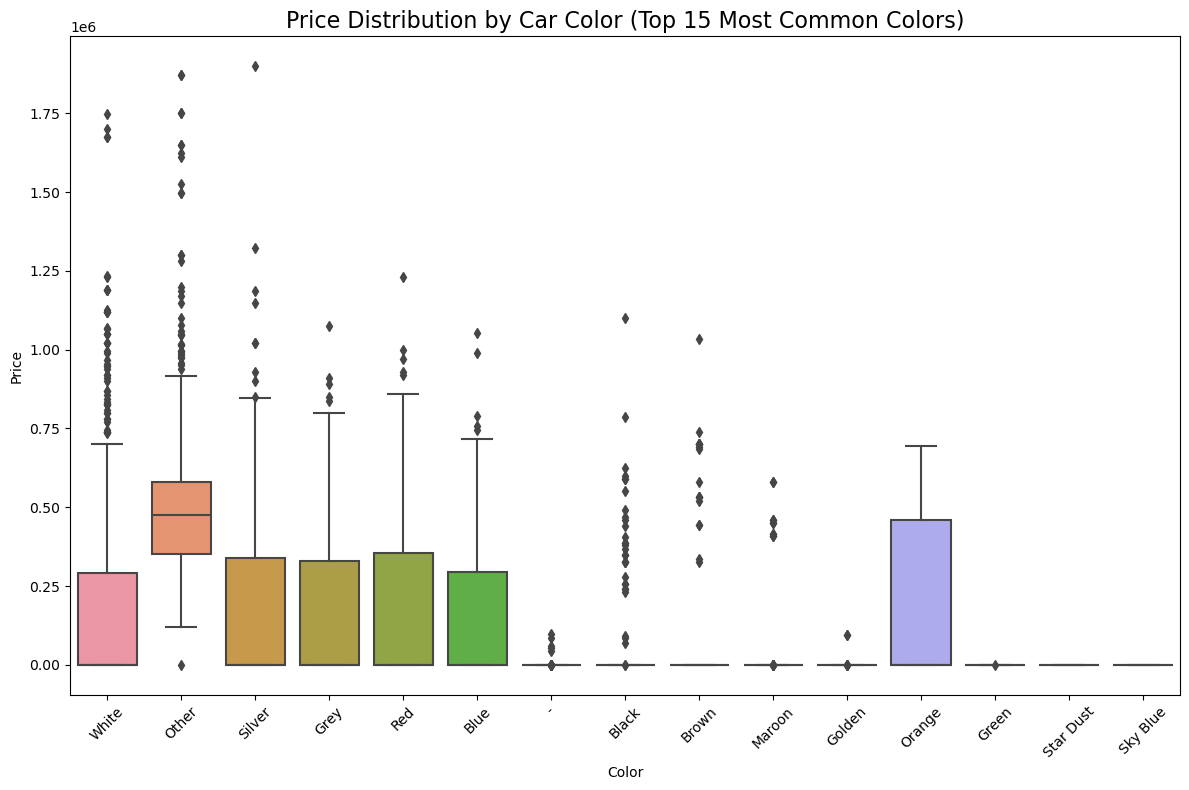

In [311]:
# Color vs Price

# Identify the most common car colors
top_colors = combined_df['Color'].value_counts().nlargest(15).index  # Get top 15 most common colors

# Filter dataset to include only the top colors
filtered_combined_df = combined_df[combined_df['Color'].isin(top_colors)]

# Create a boxplot for 'Color vs Price' with only the most common colors
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_combined_df, x='Color', y='Price', order=top_colors)
plt.xticks(rotation=45)  
plt.title('Price Distribution by Car Color (Top 15 Most Common Colors)', fontsize=16)
plt.tight_layout()  
plt.show()


Observations:
- Car prices vary significantly across different colors.
- Certain colors like white and other are associated with higher-priced cars.
- Some colors have outliers, indicating very expensive cars within those color categories.
- The median price differs across colors, with some colors having higher median prices.
In conclusion, car color can influence the price, but other factors like car model, year, and features also play a significant role.

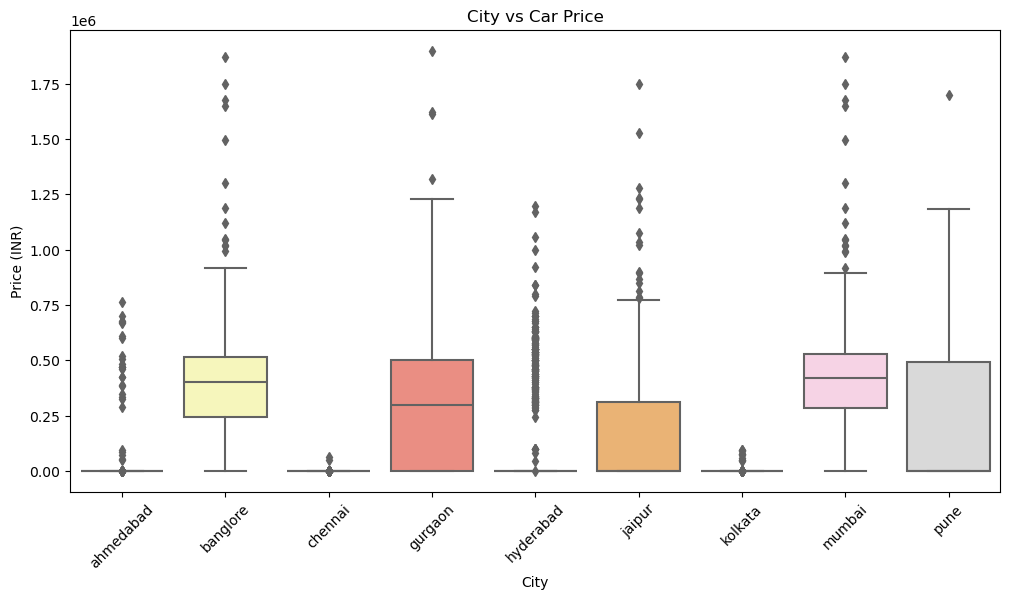

In [306]:
# Price by Location
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=combined_df, palette='Set3')
plt.title('City vs Car Price')
plt.xlabel('City')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()


Observations:
- There is significant variation in car prices across different cities.
- Some cities have outliers, indicating the presence of very expensive cars in those locations.
- The median price varies across different cities, with some cities having higher median prices.
In conclusion, the city can influence the price of a car, with certain cities having higher-priced cars.

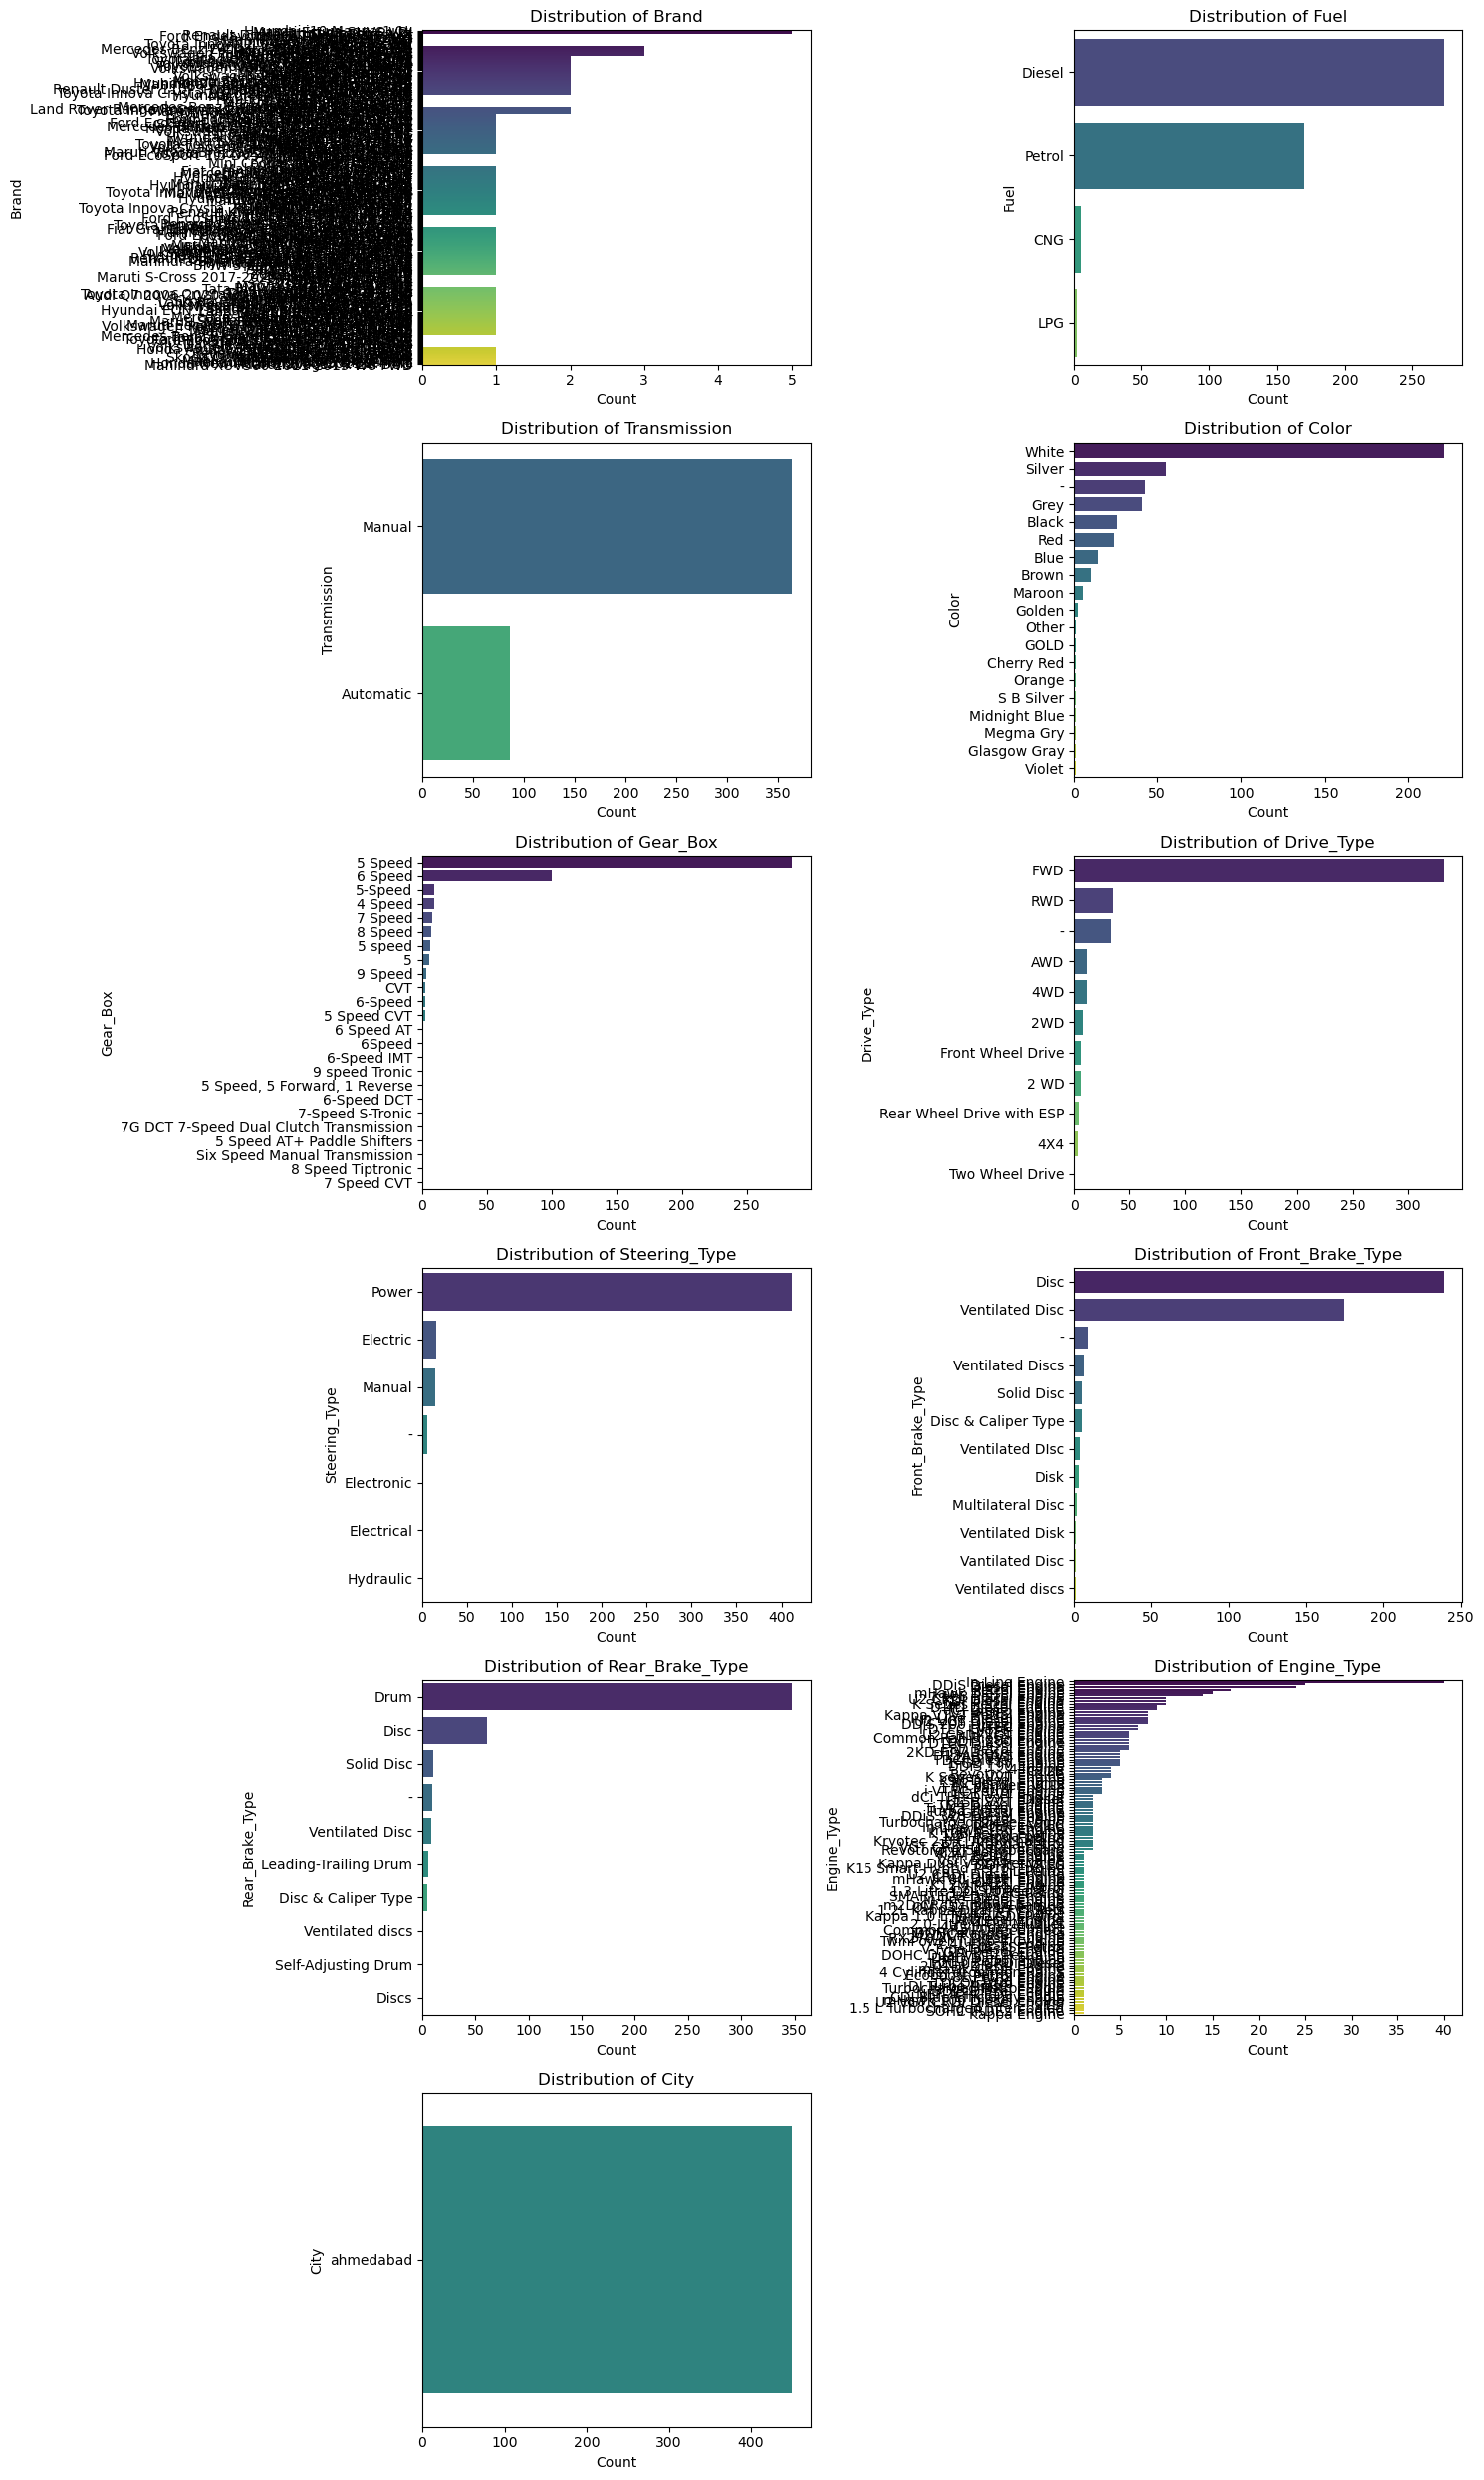

In [307]:
# Distribution of Categorical Features

categorical_columns = [
    'Brand', 'Fuel', 'Transmission', 'Color', 'Gear_Box', 'Drive_Type', 
    'Steering_Type', 'Front_Brake_Type', 'Rear_Brake_Type', 'Engine_Type', 'City'
]

# Set up the plotting space
plt.figure(figsize=(15, 25))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(6, 2, i)  # Adjust rows and columns as needed
    sns.countplot(data=df, y=column, order=df[column].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)
    plt.tight_layout()

plt.show()


### Feature Engineering

#### One-hot Encoding
Use one-hot encoding for nominal categorical variables to convert them into a format suitable for modeling.

In [266]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = ['Brand', 'Fuel', 'Transmission', 'Color', 'Drive_Type', 'Steering_Type', 'Engine_Type', 'City', 'Gear_Box','Front_Brake_Type','Rear_Brake_Type']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity by dropping one column

# Fit and transform the categorical columns
encoded_array = encoder.fit_transform(combined_df[categorical_cols])

# Create a DataFrame from the encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the original DataFrame with the encoded DataFrame and drop the original categorical columns
combined_df_encoded = pd.concat([combined_df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Display the first few rows of the new DataFrame
combined_df_encoded.head()

,Unnamed: 0,Make_Year,KMs_Driven,Engine_Displacement,No_Of_Owner,Mileage,Max_Power,Torque,Seats,Acceleration,...,Rear_Brake_Type_Self adjusting drums,Rear_Brake_Type_Self-Adjusting Drum,Rear_Brake_Type_Solid Disc,Rear_Brake_Type_Unknown,Rear_Brake_Type_Vacuum assisted hydraulic dual circuit w,Rear_Brake_Type_Ventialted Disc,Rear_Brake_Type_Ventilated Disc,Rear_Brake_Type_Ventilated Discs,Rear_Brake_Type_Ventilated Drum,Rear_Brake_Type_Ventilated discs
0,0,2017,32540,1197.0,1.0,19.1,82.00,114.00,5,14.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2015,41061,1197.0,1.0,18.6,81.83,114.70,5,13.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2018,40674,1198.0,1.0,17.8,86.70,109.00,5,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2011,67142,1496.0,1.0,17.6,15.00,5.00,5,13.3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2018,19274,1197.0,1.0,21.0,81.86,114.74,5,13.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Feature Scaling
Feature scaling ensures that your features are on a similar scale, which can be important for many machine learning algorithms.
Standardization: Scale features to have a mean of 0 and a standard deviation of 1.
Normalization: Scale features to a range of [0, 1].

In [267]:
from sklearn.preprocessing import StandardScaler

# Check the columns in combined_df_encoded
#numerical_cols = combined_df_encoded.select_dtypes(include=['number']).columns

#numerical_cols = ['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque', 'Seats', 'Acceleration']
#print(combined_df_encoded[numerical_cols].isnull().sum())

In [268]:
# Initialize the scaler
#scaler = StandardScaler()

# Fit and transform the numerical columns
#combined_df_encoded[numerical_cols] = scaler.fit_transform(combined_df_encoded[numerical_cols])
# Review the scaled data
#print(combined_df_encoded[numerical_cols].head())

In [269]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
numerical_cols = ['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque', 'Seats', 'Acceleration']

# Initialize StandardScaler for scaling numerical data
scaler = StandardScaler()

# Scale the numerical columns and store it in a DataFrame with the same column names
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(combined_df_encoded[numerical_cols]), columns=numerical_cols)

# Select all the categorical columns (these are the ones not in numerical_cols)
categorical_cols = [col for col in combined_df_encoded.columns if col not in numerical_cols]
# Extract the one-hot encoded categorical columns
encoded_categorical_df = combined_df_encoded[categorical_cols]

# Combine scaled numerical data and encoded categorical data into one DataFrame
final_df = pd.concat([scaled_numerical_df, encoded_categorical_df], axis=1)

# Display the first few rows of the final DataFrame
print("Combined DataFrame with scaled numerical and encoded categorical data:")
final_df.head()


Combined DataFrame with scaled numerical and encoded categorical data:


,KMs_Driven,Engine_Displacement,Mileage,Max_Power,Torque,Seats,Acceleration,Unnamed: 0,Make_Year,No_Of_Owner,...,Rear_Brake_Type_Self adjusting drums,Rear_Brake_Type_Self-Adjusting Drum,Rear_Brake_Type_Solid Disc,Rear_Brake_Type_Unknown,Rear_Brake_Type_Vacuum assisted hydraulic dual circuit w,Rear_Brake_Type_Ventialted Disc,Rear_Brake_Type_Ventilated Disc,Rear_Brake_Type_Ventilated Discs,Rear_Brake_Type_Ventilated Drum,Rear_Brake_Type_Ventilated discs
0,-0.530154,-0.397338,-0.051647,-0.055285,-0.423364,-0.288186,0.267059,0,2017,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.359916,-0.397338,-0.072989,-0.055288,-0.423364,-0.288186,-0.110126,1,2015,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.367648,-0.395150,-0.107136,-0.055193,-0.423364,-0.288186,0.568807,2,2018,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.161146,0.256859,-0.115672,-0.056588,-0.423364,-0.288186,-0.072408,3,2011,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.795190,-0.397338,0.029451,-0.055288,-0.423364,-0.288186,-0.072408,4,2018,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Selection
Feature selection helps in reducing the feature by identifying and selecting the most important features helping improve model performance.
SelectKBest uses statistical tests to select the top K features.

In [270]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separate the features and target variable
X = final_df.drop(columns=['Price'])  
y = final_df['Price'] 

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest with a specified number of features
k = 20  # Adjust this number based on how many top features you want to select
selector = SelectKBest(score_func=f_regression, k=k)
X_kbest = selector.fit_transform(X_scaled, y)

# Retrieve the names of the selected features
selected_features = X.columns[selector.get_support()]
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Output the selected features to verify
print(f"Selected Features:\n{selected_features}")
X_kbest_df.head()

# Now you can use X_kbest_df and y for modeling


Selected Features:
Index(['KMs_Driven', 'Engine_Displacement', 'Torque', 'Unnamed: 0',
       'Make_Year', 'No_Of_Owner', 'Brand_2019 Hyundai Venue',
       'Brand_2019 MG Hector', 'Fuel_Diesel', 'Fuel_Petrol', 'Color_Other',
       'Drive_Type_FWD', 'Engine_Type_In-Line Engine', 'City_banglore',
       'City_chennai', 'City_gurgaon', 'City_kolkata', 'City_mumbai',
       'Rear_Brake_Type_Disc', 'Rear_Brake_Type_Drum'],
      dtype='object')


,KMs_Driven,Engine_Displacement,Torque,Unnamed: 0,Make_Year,No_Of_Owner,Brand_2019 Hyundai Venue,Brand_2019 MG Hector,Fuel_Diesel,Fuel_Petrol,Color_Other,Drive_Type_FWD,Engine_Type_In-Line Engine,City_banglore,City_chennai,City_gurgaon,City_kolkata,City_mumbai,Rear_Brake_Type_Disc,Rear_Brake_Type_Drum
0,-0.530154,-0.397338,-0.423364,-1.461083,0.681273,-0.258324,-0.048108,-0.031033,-0.834024,0.845684,2.279096,0.481162,-0.281665,3.064963,-0.371411,-0.489635,-0.365009,-0.377424,-0.323009,0.451183
1,-0.359916,-0.397338,-0.423364,-1.456553,0.034947,-0.258324,-0.048108,-0.031033,-0.834024,0.845684,-0.438770,0.481162,-0.281665,3.064963,-0.371411,-0.489635,-0.365009,-0.377424,-0.323009,0.451183
2,-0.367648,-0.395150,-0.423364,-1.452023,1.004437,-0.258324,-0.048108,-0.031033,-0.834024,0.845684,-0.438770,0.481162,-0.281665,3.064963,-0.371411,-0.489635,-0.365009,-0.377424,-0.323009,0.451183
3,0.161146,0.256859,-0.423364,-1.447493,-1.257707,-0.258324,-0.048108,-0.031033,-0.834024,0.845684,2.279096,-2.078303,-0.281665,3.064963,-0.371411,-0.489635,-0.365009,-0.377424,-0.323009,-2.216394
4,-0.795190,-0.397338,-0.423364,-1.442963,1.004437,-0.258324,-0.048108,-0.031033,-0.834024,0.845684,-0.438770,-2.078303,-0.281665,3.064963,-0.371411,-0.489635,-0.365009,-0.377424,-0.323009,0.451183


## MODELING

### Linear Regression and Decision Tree Models

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_kbest_df, y, test_size=0.2, random_state=42)

# Define the parameter grids for hyperparameter tuning
linear_params = {
    'linearregressor__fit_intercept': [True, False]
}

tree_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']  
}

# Create a pipeline for Linear Regression with StandardScaler
linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the data
    ('linearregressor', LinearRegression())  # Linear Regression model
])

# Linear Regression with GridSearchCV
linear_grid_search = GridSearchCV(linear_pipeline, linear_params, cv=5, scoring='neg_mean_squared_error')
linear_grid_search.fit(X_train, y_train)

# Best Linear Regression model
best_linear_model = linear_grid_search.best_estimator_
y_pred_linear = best_linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

print("Linear Regression Results")
print("Best Parameters:", linear_grid_search.best_params_)
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)
print()

# Decision Tree Regression with GridSearchCV
tree_model = DecisionTreeRegressor(random_state=42)
tree_grid_search = GridSearchCV(tree_model, tree_params, cv=5, scoring='neg_mean_squared_error', error_score='raise')
tree_grid_search.fit(X_train, y_train)

# Best Decision Tree model
best_dt_model = tree_grid_search.best_estimator_
y_pred_tree = best_dt_model.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regression Results")
print("Best Parameters:", tree_grid_search.best_params_)
print("Mean Squared Error:", tree_mse)
print("R-squared:", tree_r2)


Linear Regression Results
Best Parameters: {'linearregressor__fit_intercept': True}
Mean Squared Error: 35095117132.357506
R-squared: 0.5882070158461238

Decision Tree Regression Results
Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 19413529636.428795
R-squared: 0.7722089009763133


### Random Forest Regressor with Hyperparameter Tuning

In [272]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the parameter grid for Random Forest Regressor
rf_params = {
    'n_estimators': [100, 150, 200],  # Number of trees
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],        # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider for the best split
}

# Create a Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to search over hyperparameters with fewer iterations
rf_random_search = RandomizedSearchCV(rf_model, rf_params, n_iter=10, cv=5, 
                                      scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf_random_search.fit(X_train, y_train)

# Best Random Forest model
best_rf_model = rf_random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)  # RMSE is the square root of MSE
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Display the results
print("Random Forest Regressor Results")
print("Best Parameters:", rf_random_search.best_params_)
print("Mean Squared Error (MSE):", rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)
print("R-squared:", rf_r2)
print("Mean Absolute Error (MAE):", rf_mae)


KeyboardInterrupt: 

### GradientBoosting Regressor with Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the parameter grid for Gradient Boosting Regressor
gb_params = {
    'n_estimators': [100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking
    'max_depth': [3, 5, 10],  # Maximum depth of individual trees
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0]  # Fraction of samples used for fitting
}

# Create a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Use RandomizedSearchCV to search over hyperparameters with fewer iterations
gb_random_search = RandomizedSearchCV(gb_model, gb_params, n_iter=10, cv=5, 
                                      scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
gb_random_search.fit(X_train, y_train)

# Best Gradient Boosting model
best_gb_model = gb_random_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)  # RMSE is the square root of MSE
gb_mae = mean_absolute_error(y_test, y_pred_gb)

# Display the results
print("Gradient Boosting Regressor Results")
print("Best Parameters:", gb_random_search.best_params_)
print("Mean Squared Error (MSE):", gb_mse)
print("Root Mean Squared Error (RMSE):", gb_rmse)
print("R-squared:", gb_r2)
print("Mean Absolute Error (MAE):", gb_mae)


Gradient Boosting Regressor Results
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'learning_rate': 0.05}
Mean Squared Error (MSE): 7881595885.873415
Root Mean Squared Error (RMSE): 88778.35257467563
R-squared: 0.907520300402522
Mean Absolute Error (MAE): 37738.84336102535


## EVALUATION

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Evaluate function to calculate MSE, R2, RMSE, and MAE
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, r2, rmse, mae

# Predict using the best models
y_pred_dt = best_dt_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the Decision Tree model
dt_mse, dt_r2, dt_rmse, dt_mae = evaluate_model(y_test, y_pred_dt)

# Evaluate the Random Forest model
rf_mse, rf_r2, rf_rmse, rf_mae = evaluate_model(y_test, y_pred_rf)

# Evaluate the Gradient Boosting model
gb_mse, gb_r2, gb_rmse, gb_mae = evaluate_model(y_test, y_pred_gb)

# Print evaluation results for Decision Tree
print("Decision Tree Results")
print(f"Mean Squared Error: {dt_mse}")
print(f"R-squared: {dt_r2}")
print(f"RMSE: {dt_rmse}")
print(f"MAE: {dt_mae}\n")

# Print evaluation results for Random Forest
print("Random Forest Results")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}\n")

# Print evaluation results for Gradient Boosting
print("Gradient Boosting Results")
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared: {gb_r2}")
print(f"RMSE: {gb_rmse}")
print(f"MAE: {gb_mae}\n")


Decision Tree Results
Mean Squared Error: 19413529636.428795
R-squared: 0.7722089009763133
RMSE: 139332.4428711016
MAE: 51966.9433510514

Random Forest Results
Mean Squared Error: 10533710529.249798
R-squared: 0.8764013786677595
RMSE: 102633.86638556398
MAE: 45587.63831664619

Gradient Boosting Results
Mean Squared Error: 7881595885.873415
R-squared: 0.907520300402522
RMSE: 88778.35257467563
MAE: 37738.84336102535



#### Principal Component Analysis
Used for dimensionality reduction before feature selection  helping reduce the size of the dataset significantly.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


# Separate features and target
X = final_df.drop(columns=['Price'])  # Assuming 'price' is the target variable
y = final_df['Price']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X)

# Feature selection on the PCA-transformed data using RandomForest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf_model.fit(X_pca, y)

# Get feature importances from the transformed PCA components
feature_importances = pd.DataFrame(rf_model.feature_importances_, columns=['importance'])
top_important_features = feature_importances.nlargest(50, 'importance').index

#  Feature Selection with Lasso on the PCA-transformed data
lasso = Lasso(alpha=0.01, random_state=42)
lasso_selector = SelectFromModel(lasso, threshold='mean')  # Use 'mean' for threshold to select more features
lasso_selector.fit(X_pca, y)

# Get the boolean mask for the selected features
selected_features_mask = lasso_selector.get_support()

# Get the corresponding feature names (i.e., PCA components)
selected_pca_features = [f'PC{i+1}' for i in range(X_pca.shape[1]) if selected_features_mask[i]]
print("Selected PCA components:", selected_pca_features)



Selected PCA components: ['PC1']


In [ ]:
# Inspect the loadings of the first principal component

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=X.columns)

# Show the loadings for 'PC1'
pc1_loadings = loadings['PC1'].sort_values(ascending=False)

# Display the top features that contribute to 'PC1'
print("Top features contributing to PC1:")
print(pc1_loadings.head(10))  # Show top 10 features contributing to PC1


Top features contributing to PC1:
Unnamed: 0                0.999999
City_gurgaon              0.000712
Torque                    0.000663
Engine_Displacement       0.000631
Transmission_Automatic    0.000210
KMs_Driven                0.000148
Fuel_Diesel               0.000147
Seats                     0.000143
Rear_Brake_Type_Disc      0.000131
Gear_Box_8 Speed          0.000082
Name: PC1, dtype: float64


In [ ]:

# Perform PCA to reduce dimensions
pca = PCA(n_components=3)  # You can adjust the number of components as necessary
X_pca = pca.fit_transform(X)  # X is your feature data (not including the target)

# Create a DataFrame to hold the PCA components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Combine PCA components with the target variable (Price)
#final_df = pd.concat([X_pca_df, y], axis=1)

# Verify the DataFrame
#print(final_df.head())



## MODELING

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into features and target variable
X_pca = final_df[['PC1', 'PC2', 'PC3']]  # PCA components as features
y = final_df['Price']  # Target variable (price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Scaling the PCA data (though PCA typically scales internally, this is just in case you want to apply further scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



KeyError: "None of [Index(['PC1', 'PC2', 'PC3'], dtype='object')] are in the [columns]"

### Random Forest and Gradient Boosting Models

In [ ]:

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning using RandomizedSearchCV

# Random Forest Hyperparameter Grid
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Gradient Boosting Hyperparameter Grid
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform RandomizedSearchCV for RandomForest
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)

# Perform RandomizedSearchCV for GradientBoosting
gb_random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=gb_param_grid, n_iter=10, cv=3, random_state=42, n_jobs=-1)
gb_random_search.fit(X_train, y_train)

# Get the best models from RandomizedSearchCV
best_rf_model = rf_random_search.best_estimator_
best_gb_model = gb_random_search.best_estimator_



## EVALUATION

In [ ]:

# Predict using RandomForest
rf_preds = best_rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))

# Predict using GradientBoosting
gb_preds = best_gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_preds))

#  Print the results
print("Random Forest Regression Results:")
print(f"R²: {rf_r2:.4f}")
print(f"MAE: {rf_mae:.4f}")
print(f"RMSE: {rf_rmse:.4f}")

print("\nGradient Boosting Regression Results:")
print(f"R²: {gb_r2:.4f}")
print(f"MAE: {gb_mae:.4f}")
print(f"RMSE: {gb_rmse:.4f}")


Random Forest Regression Results:
R²: 0.2631
MAE: 168325.0237
RMSE: 250603.8665

Gradient Boosting Regression Results:
R²: 0.2262
MAE: 180893.9247
RMSE: 256798.2670


In [ ]:
from sklearn.decomposition import PCA

# Set the number of components for PCA (adjust based on how many features you want)
n_components = 50  

# Apply PCA to the scaled and encoded data
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(final_df)

# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(n_components)])

# Display the reduced DataFrame
print("Reduced DataFrame using PCA:")
pca_df.head()


ValueError: n_components=50 must be between 0 and min(n_samples, n_features)=4 with svd_solver='full'

In [ ]:
# Check cumulative explained variance to see how much information is retained
explained_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance by Components:", explained_variance)


Cumulative Explained Variance by Components: [0.9999994 1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.       ]


Cumulative Explained Variance by Components: [0.9999994 1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.        1.        1.        1.        1.        1.        1.
 1.       ]


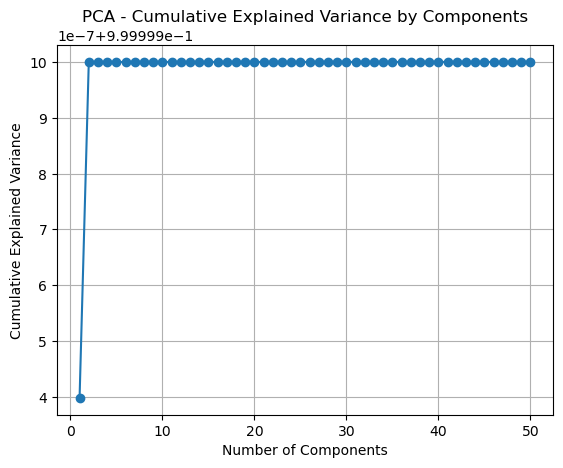

Number of components chosen: 1


NameError: name 'X_scaled' is not defined

In [ ]:
# Step 1: Check cumulative explained variance to choose the number of components
explained_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance by Components:", explained_variance)

# You can visualize to see the cumulative variance explained by components
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance by Components')
plt.grid(True)
plt.show()

# Step 2: Choose n components that cover, for example, 90% of variance
n_components = next(i for i, total_var in enumerate(explained_variance) if total_var >= 0.90) + 1
print(f"Number of components chosen: {n_components}")

# Step 3: Re-run PCA with the chosen number of components
pca = PCA(n_components=n_components, random_state=42)
X_reduced = pca.fit_transform(X_scaled)  # X_scaled is the scaled version of your data without the target

# Optional: Store the selected components in a DataFrame for easier handling
pca_df_reduced = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])

# Step 4: Use this reduced DataFrame (pca_df_reduced) for model training
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(pca_df_reduced, target, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Outlier Detection
Identify and handle outliers in numerical columns using the IQR (Interquartile Range) method.

In [ ]:

# Calculate the IQR for the 'Price' column
Q1 = combined_df['Price'].quantile(0.25)
Q3 = combined_df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = combined_df[(combined_df['Price'] < lower_bound) | (combined_df['Price'] > upper_bound)]
print(f"Number of outliers in 'Price': {outliers.shape[0]}")

# Optionally, visualize outliers with a box plot

#plt.figure(figsize=(10, 6))
#sns.boxplot(data=combined_df, y='Price')
#plt.title('Box Plot for Price')
#plt.show()


Number of outliers in 'Price': 70


### Feature Selection
Feature selection helps in reducing the feature by identifying and selecting the most important features helping improve model performance.
SelectKBest uses statistical tests to select the top K features.

#### Correlation Matrix
Helps you visualize and identify potential multicollinearity between features.

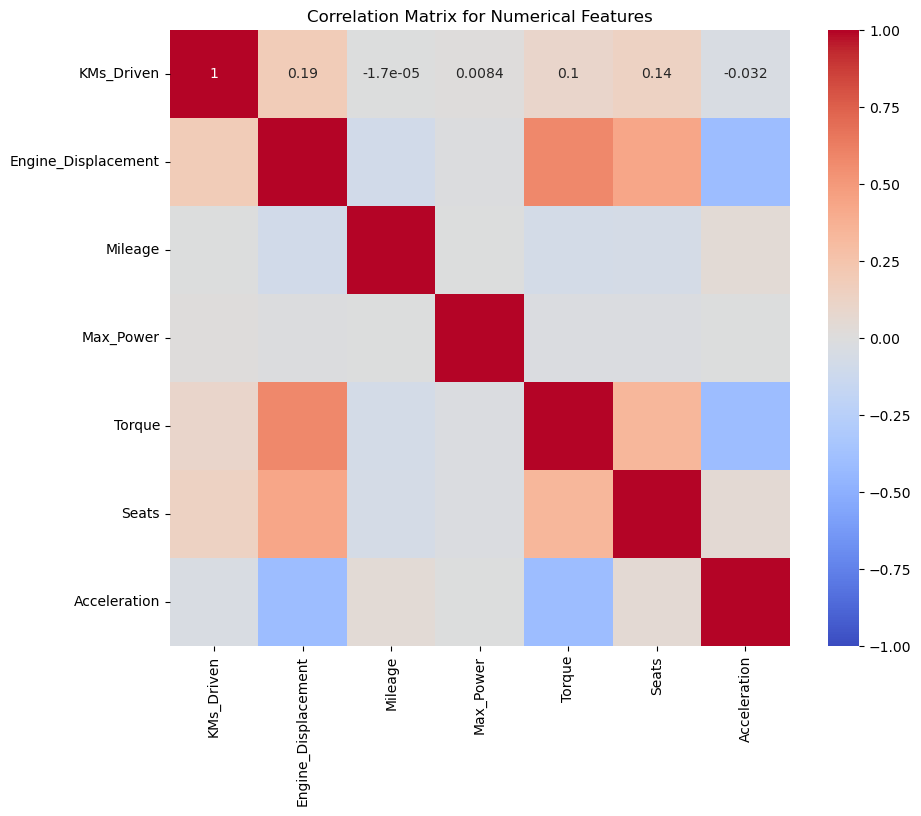

In [ ]:

# Create a correlation matrix for numerical features
correlation_matrix = final_df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()


#### Adressing Multicollinearity
Calculate the VIF for each feature and iteratively remove features with a high VIF until all remaining features have acceptable levels of multicollinearity.

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Copy the DataFrame excluding the target variable ('Price')
#X = combined_df_encoded[numerical_cols].drop('Price', axis=1, errors='ignore')  # 'Price' is excluded as it's the target variable
X = final_df[numerical_cols].drop('Price', axis=1, errors='ignore')
# Calculate initial VIF values
vif_df = calculate_vif(X)
print("Initial VIF values:")
print(vif_df)

# Iteratively remove features with VIF > 10
threshold = 10
while vif_df['VIF'].max() > threshold:
    feature_to_drop = vif_df.sort_values('VIF', ascending=False).iloc[0]['Feature']
    print(f"Dropping feature '{feature_to_drop}' with VIF: {vif_df['VIF'].max()}")
    X = X.drop(columns=[feature_to_drop])
    vif_df = calculate_vif(X)

print("Final VIF values:")
print(vif_df)

# Update combined_df_encoded by removing all features dropped in the loop
#features_dropped = [col for col in combined_df_encoded.columns if col not in X.columns and col != 'Price']
#combined_df_encoded = combined_df_encoded.drop(columns=features_dropped, errors='ignore')

features_dropped = [col for col in final_df.columns if col not in X.columns and col != 'Price']
final_df = final_df.drop(columns=features_dropped, errors='ignore')


c:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define X and y
X = final_df.drop('Price', axis=1)  # Drop the target variable
y = final_df['Price']

# Initialize SelectKBest with f_regression as the score function and select all features
selector = SelectKBest(score_func=f_regression, k='all')

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with selected features (and optionally add Price if needed)
combined_selected_df = combined_df_encoded[selected_features]
combined_selected_df = combined_selected_df.assign(Price=y)

# Print the selected features
print(selected_features)


KeyError: "None of [Index(['PC1', 'PC2', 'PC3'], dtype='object')] are in the [columns]"

In [ ]:
combined_selected_df.head(10)

,KMs_Driven,Engine_Displacement,Mileage,Max_Power,Torque,Seats,Acceleration,Price
0,-0.530154,-0.397338,-0.051647,-0.055285,-0.423364,-0.288186,0.267059,597000.0
1,-0.359916,-0.397338,-0.072989,-0.055288,-0.423364,-0.288186,-0.110126,570000.0
2,-0.367648,-0.395150,-0.107136,-0.055193,-0.423364,-0.288186,0.568807,600000.0
3,0.161146,0.256859,-0.115672,-0.056588,-0.423364,-0.288186,-0.072408,349500.0
4,-0.795190,-0.397338,0.029451,-0.055288,-0.423364,-0.288186,-0.072408,780000.0
5,-0.261002,0.259047,-0.141282,-0.054519,-0.423364,-0.288186,-0.072408,554000.0
6,0.829770,0.038064,0.040975,-0.055153,-0.423364,-0.288186,-0.072408,415000.0
7,-0.852209,-1.235323,0.033719,-0.055806,-0.423364,-0.288186,2.077549,270000.0
8,-0.677835,-0.830552,0.115244,-0.055577,-0.423364,-0.288186,-0.072408,375000.0
9,0.063091,0.261235,0.059329,-0.054950,-0.423364,-0.288186,-0.072408,600000.0


ValueError: k should be <= n_features = 7; got 50. Use k='all' to return all features.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Drop the target variable (Price)
X = combined_df_encoded.drop('Price', axis=1)

# Proceed with feature selection
y = combined_df_encoded['Price']

# Set SelectKBest with f_regression and select all features
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features = X.columns[selector.get_support()]

# Create a new DataFrame with selected features and re-add the target variable
combined_selected_df = X[selected_features]  # Use the selected features from X
combined_selected_df = combined_selected_df.assign(Price=y)  # Add the target variable back

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Acceleration'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define features and target
X = combined_df_encoded.drop('Price', axis=1)
y = combined_df_encoded['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and RFECV
model = LinearRegression()
selector = RFECV(estimator=model, step=1, cv=5)

# Fit RFECV to data
selector.fit(X_train, y_train)

# Get the selected features
selected_features_rfecv = X.columns[selector.support_]

print("Selected Features using RFECV:")
print(selected_features_rfecv)


Selected Features using RFECV:
Index(['KMs_Driven', 'Engine_Displacement', 'Mileage', 'Max_Power', 'Torque',
       'Seats', 'Acceleration'],
      dtype='object')
